In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%config Completer.use_jedi = False

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas_profiling
import sweetviz as sv

In [4]:
os.getcwd()

'C:\\Users\\gmbas\\Downloads\\Files_lol_project'

In [5]:
os.chdir('datasets')

## Preparing the dataset to start EDA

In [6]:
df = pd.read_csv('C:\\Users\\gmbas\\Downloads\\Files_lol_project\\datasets\\932_matches_df_21_06')

In [7]:
df

,Unnamed: 0,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,...,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
0,0,1.976583,4.573580,4.756204,5.939718,6.626648,1.162788,4.747214,5.366882,5.895539,...,6045,27869,139033,90591,17226,60900,104796.0,5702,6894.0,1
1,1,3.867070,5.469181,5.623977,6.249752,6.870524,0.740881,3.587890,5.125936,5.649067,...,12382,39489,1173761,230329,2342839,25119,39085.0,120399,81033.0,0
2,2,1.080000,4.598162,4.825763,5.340403,5.681439,2.085663,4.498963,4.766707,5.405575,...,35375,18062,30808,53165,10990,1209,11605.0,17510,1377402.0,1
3,3,0.363769,2.671286,4.984266,5.148903,5.976233,1.734322,5.071400,5.178816,6.166968,...,191837,193851,27186,159593,464856,47094,58443.0,87329,19550.0,0
4,4,1.368294,4.925813,5.484073,5.915913,6.164462,0.815051,5.392639,5.477247,6.682713,...,101033,1233,34450,15688,11980,22250,52517.0,71398,11441.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,927,0.206679,3.242855,3.858181,4.125231,5.436693,3.042890,4.194576,4.323031,4.890833,...,10650,35904,56382,495855,66034,2743,709380.0,721154,202130.0,1
928,928,1.513932,4.858114,5.456084,6.261634,6.332916,4.486468,4.896937,4.932086,5.188566,...,1414,85240,100878,543559,6775,946303,12643.0,3374,2092.0,1
929,929,1.941900,4.367879,4.490651,5.920417,6.566390,0.475627,3.839915,4.261205,5.287674,...,7072,37538,139703,150471,152271,8974,27138.0,9033,178701.0,0
930,930,1.697442,2.560060,5.208572,6.171789,6.474445,1.276204,5.618855,6.072157,6.331045,...,3571,48540,11851,3029,38679,352602,394108.0,65706,825205.0,1


In [8]:
df.columns

Index(['Unnamed: 0', '5th_CS_min_blue', '4th_CS_min_blue', '3rd_CS_min_blue',
       '2nd_CS_min_blue', '1st_CS_min_blue', '5th_CS_min_red',
       '4th_CS_min_red', '3rd_CS_min_red', '2nd_CS_min_red', '1st_CS_min_red',
       '5th_kda_blue', '4th_kda_blue', '3rd_kda_blue', '2nd_kda_blue',
       '1st_kda_blue', '5th_kda_red', '4th_kda_red', '3rd_kda_red',
       '2nd_kda_red', '1st_kda_red', '5th_MP_blue', '4th_MP_blue',
       '3rd_MP_blue', '2nd_MP_blue', '1st_MP_blue', '5th_MP_red', '4th_MP_red',
       '3rd_MP_red', '2nd_MP_red', '1st_MP_red', 'target'],
      dtype='object')

In [9]:
df = df.drop('Unnamed: 0',axis = 1)
df

,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,1st_CS_min_red,...,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
0,1.976583,4.573580,4.756204,5.939718,6.626648,1.162788,4.747214,5.366882,5.895539,6.067965,...,6045,27869,139033,90591,17226,60900,104796.0,5702,6894.0,1
1,3.867070,5.469181,5.623977,6.249752,6.870524,0.740881,3.587890,5.125936,5.649067,6.146694,...,12382,39489,1173761,230329,2342839,25119,39085.0,120399,81033.0,0
2,1.080000,4.598162,4.825763,5.340403,5.681439,2.085663,4.498963,4.766707,5.405575,6.289723,...,35375,18062,30808,53165,10990,1209,11605.0,17510,1377402.0,1
3,0.363769,2.671286,4.984266,5.148903,5.976233,1.734322,5.071400,5.178816,6.166968,6.529087,...,191837,193851,27186,159593,464856,47094,58443.0,87329,19550.0,0
4,1.368294,4.925813,5.484073,5.915913,6.164462,0.815051,5.392639,5.477247,6.682713,7.049121,...,101033,1233,34450,15688,11980,22250,52517.0,71398,11441.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0.206679,3.242855,3.858181,4.125231,5.436693,3.042890,4.194576,4.323031,4.890833,5.414535,...,10650,35904,56382,495855,66034,2743,709380.0,721154,202130.0,1
928,1.513932,4.858114,5.456084,6.261634,6.332916,4.486468,4.896937,4.932086,5.188566,5.850610,...,1414,85240,100878,543559,6775,946303,12643.0,3374,2092.0,1
929,1.941900,4.367879,4.490651,5.920417,6.566390,0.475627,3.839915,4.261205,5.287674,5.424155,...,7072,37538,139703,150471,152271,8974,27138.0,9033,178701.0,0
930,1.697442,2.560060,5.208572,6.171789,6.474445,1.276204,5.618855,6.072157,6.331045,6.960445,...,3571,48540,11851,3029,38679,352602,394108.0,65706,825205.0,1


In [10]:
df = df.drop(['5th_MP_blue', '4th_MP_blue',
       '3rd_MP_blue', '2nd_MP_blue', '1st_MP_blue', '5th_MP_red', '4th_MP_red',
       '3rd_MP_red', '2nd_MP_red', '1st_MP_red'],axis = 1)
df

,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,1st_CS_min_red,...,4th_kda_blue,3rd_kda_blue,2nd_kda_blue,1st_kda_blue,5th_kda_red,4th_kda_red,3rd_kda_red,2nd_kda_red,1st_kda_red,target
0,1.976583,4.573580,4.756204,5.939718,6.626648,1.162788,4.747214,5.366882,5.895539,6.067965,...,2.250000,2.516667,2.750000,3.111111,1.354167,1.857143,1.916667,2.000000,2.316667,1
1,3.867070,5.469181,5.623977,6.249752,6.870524,0.740881,3.587890,5.125936,5.649067,6.146694,...,1.261364,1.571429,2.181818,2.950000,1.520833,1.777778,2.000000,2.173611,3.614286,0
2,1.080000,4.598162,4.825763,5.340403,5.681439,2.085663,4.498963,4.766707,5.405575,6.289723,...,1.472222,1.645833,1.816667,2.160714,1.708333,1.895833,2.071429,2.386364,2.833333,1
3,0.363769,2.671286,4.984266,5.148903,5.976233,1.734322,5.071400,5.178816,6.166968,6.529087,...,1.544643,2.275000,2.750000,3.100000,1.623932,1.950000,2.171429,2.616667,2.801587,0
4,1.368294,4.925813,5.484073,5.915913,6.164462,0.815051,5.392639,5.477247,6.682713,7.049121,...,2.225000,2.330357,2.937500,3.071429,1.866071,1.900000,2.183333,2.750000,4.958333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0.206679,3.242855,3.858181,4.125231,5.436693,3.042890,4.194576,4.323031,4.890833,5.414535,...,1.812500,2.314286,2.439394,2.500000,1.458333,1.466667,1.483333,1.680556,2.048611,1
928,1.513932,4.858114,5.456084,6.261634,6.332916,4.486468,4.896937,4.932086,5.188566,5.850610,...,2.279221,2.550000,2.687500,2.928571,1.107955,1.236111,1.662500,1.755556,1.812500,1
929,1.941900,4.367879,4.490651,5.920417,6.566390,0.475627,3.839915,4.261205,5.287674,5.424155,...,1.928571,1.944444,2.303030,2.635714,1.850000,3.000000,3.083333,3.125000,3.162338,0
930,1.697442,2.560060,5.208572,6.171789,6.474445,1.276204,5.618855,6.072157,6.331045,6.960445,...,1.950000,2.100000,2.900000,3.660714,1.633333,1.708333,2.083333,2.675000,3.000000,1


In [11]:
analyze_report = sv.analyze(df)
analyze_report.show_html('analyze.html', open_browser=False)

                                             |                                             | [  0%]   00:00 ->…

Report analyze.html was generated.


## Now let's plot the Cumulative distribution function, on for each of the feature pair for each team. 
## 'blue' in the end of the name of the feature means it came from the 'blue' team 
## 'red' in the end of the name of the feature means it came from the 'red' team

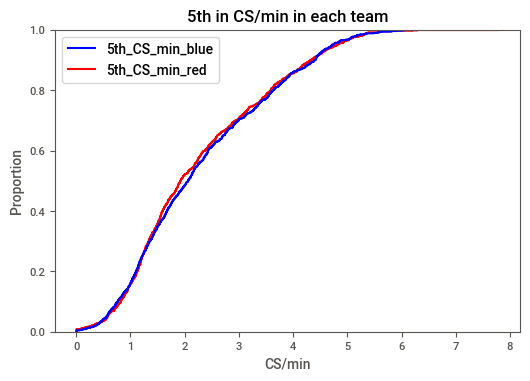

In [12]:
sns.ecdfplot([df['5th_CS_min_blue'],df['5th_CS_min_red']],palette = ['b','r'])
plt.xlabel('CS/min')
plt.title('5th in CS/min in each team')
plt.show()

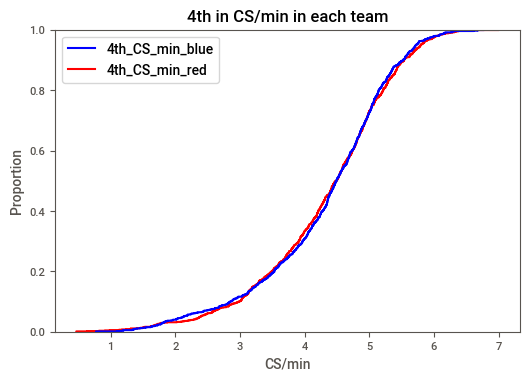

In [13]:
sns.ecdfplot([df['4th_CS_min_blue'],df['4th_CS_min_red']],palette = ['b','r'])
plt.xlabel('CS/min')
plt.title('4th in CS/min in each team')
plt.show()

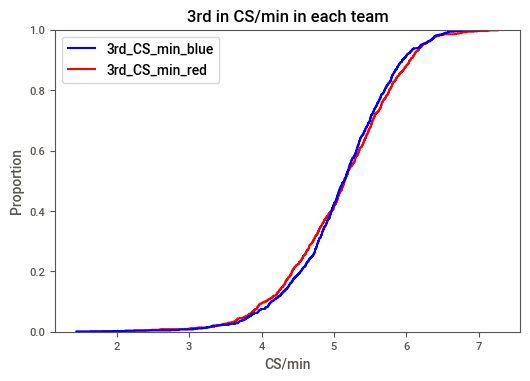

In [14]:
sns.ecdfplot([df['3rd_CS_min_blue'],df['3rd_CS_min_red']],palette = ['b','r'])
plt.xlabel('CS/min')
plt.title('3rd in CS/min in each team')
plt.show()

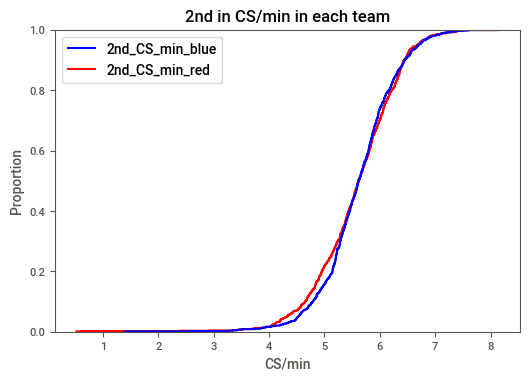

In [15]:
sns.ecdfplot([df['2nd_CS_min_blue'],df['2nd_CS_min_red']],palette = ['b','r'])
plt.xlabel('CS/min')
plt.title('2nd in CS/min in each team')
plt.show()

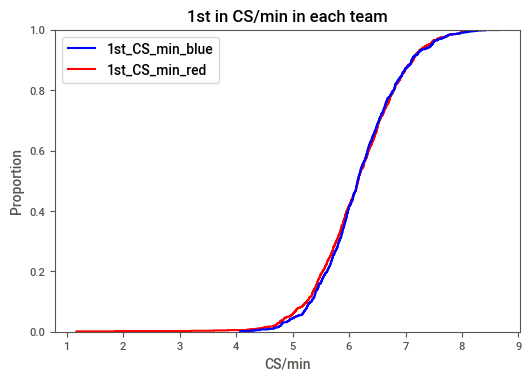

In [16]:
sns.ecdfplot([df['1st_CS_min_blue'],df['1st_CS_min_red']],palette = ['b','r'])
plt.xlabel('CS/min')
plt.title('1st in CS/min in each team')
plt.show()

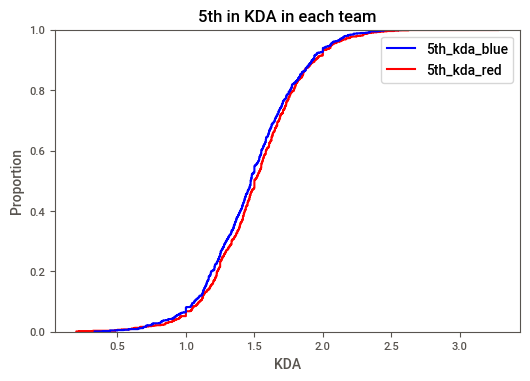

In [17]:
sns.ecdfplot([df['5th_kda_blue'],df['5th_kda_red']],palette = ['b','r'])
plt.xlabel('KDA')
plt.title('5th in KDA in each team')
plt.show()

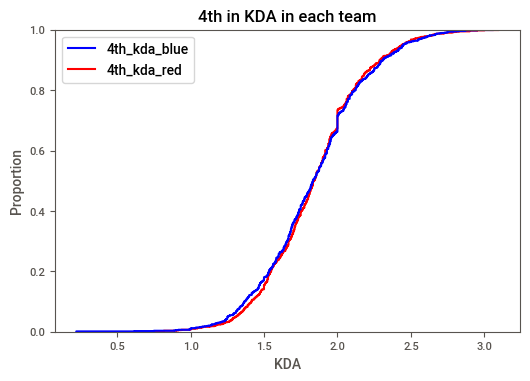

In [18]:
sns.ecdfplot([df['4th_kda_blue'],df['4th_kda_red']],palette = ['b','r'])
plt.xlabel('KDA')
plt.title('4th in KDA in each team')
plt.show()

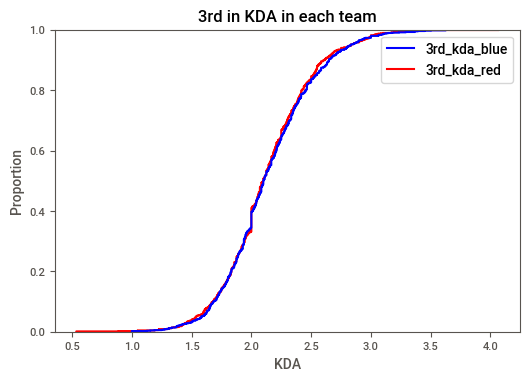

In [19]:
sns.ecdfplot([df['3rd_kda_blue'],df['3rd_kda_red']],palette = ['b','r'])
plt.xlabel('KDA')
plt.title('3rd in KDA in each team')
plt.show()

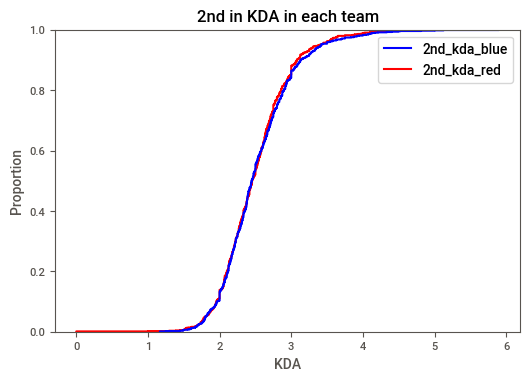

In [20]:
sns.ecdfplot([df['2nd_kda_blue'],df['2nd_kda_red']],palette = ['b','r'])
plt.xlabel('KDA')
plt.title('2nd in KDA in each team')
plt.show()

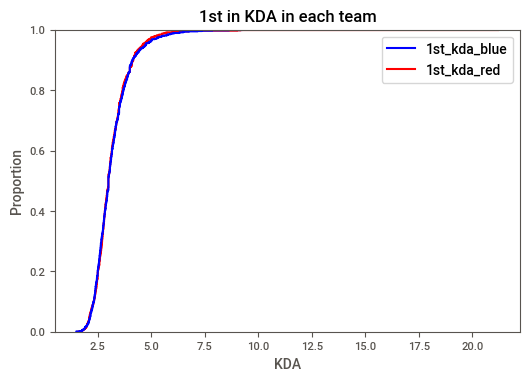

In [21]:
sns.ecdfplot([df['1st_kda_blue'],df['1st_kda_red']],palette = ['b','r'])
plt.xlabel('KDA')
plt.title('1st in KDA in each team')
plt.show()

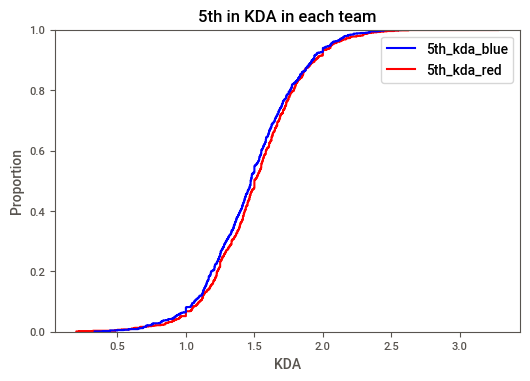

In [22]:
sns.ecdfplot([df['5th_kda_blue'],df['5th_kda_red']],palette = ['b','r'])
plt.xlabel('KDA')
plt.title('5th in KDA in each team')
plt.show()

## Now let's plot each team's features' boxplots

In [23]:
df.columns

Index(['5th_CS_min_blue', '4th_CS_min_blue', '3rd_CS_min_blue',
       '2nd_CS_min_blue', '1st_CS_min_blue', '5th_CS_min_red',
       '4th_CS_min_red', '3rd_CS_min_red', '2nd_CS_min_red', '1st_CS_min_red',
       '5th_kda_blue', '4th_kda_blue', '3rd_kda_blue', '2nd_kda_blue',
       '1st_kda_blue', '5th_kda_red', '4th_kda_red', '3rd_kda_red',
       '2nd_kda_red', '1st_kda_red', 'target'],
      dtype='object')

In [24]:
blue_team = ['5th_CS_min_blue', '4th_CS_min_blue', '3rd_CS_min_blue',
       '2nd_CS_min_blue', '1st_CS_min_blue','5th_kda_blue', '4th_kda_blue', '3rd_kda_blue', '2nd_kda_blue',
       '1st_kda_blue']

In [25]:
df_blue_team = df[blue_team]


<AxesSubplot:>

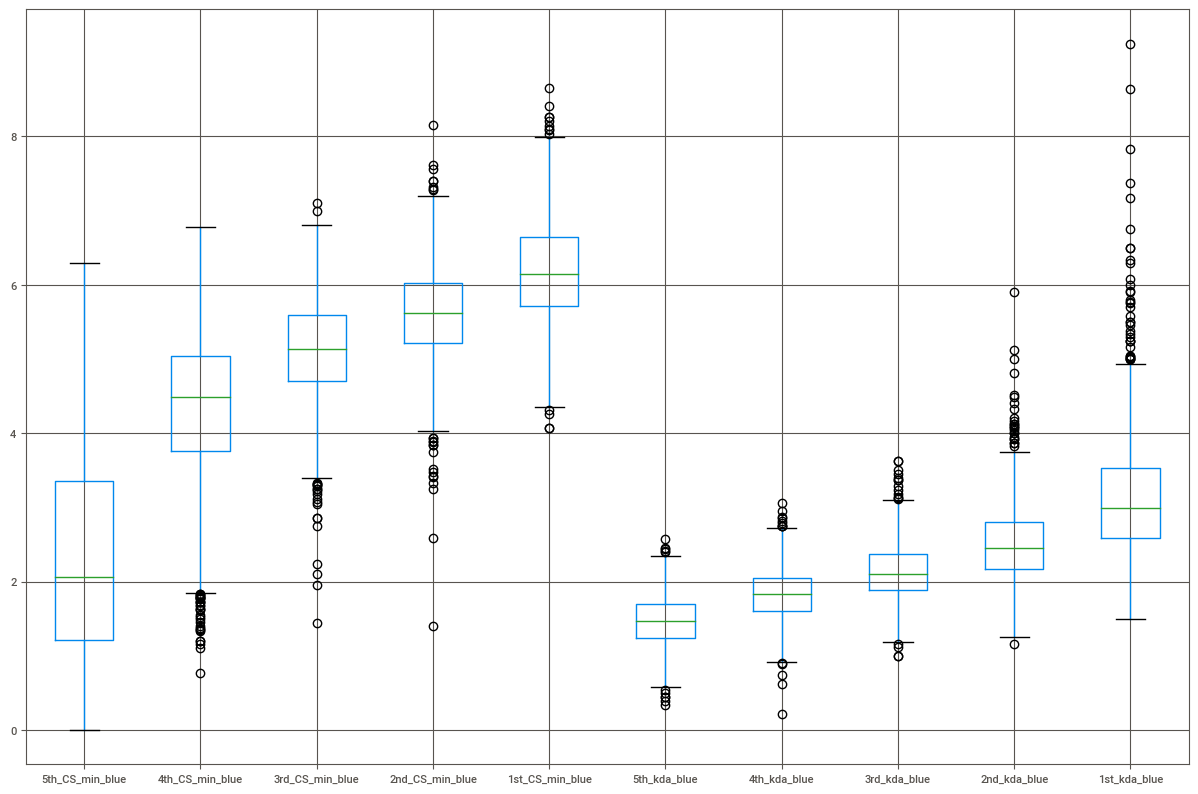

In [26]:
df_blue_team.boxplot(figsize=(15,10))

In [27]:
red_team = ['5th_CS_min_red',
       '4th_CS_min_red', '3rd_CS_min_red', '2nd_CS_min_red', '1st_CS_min_red','5th_kda_red', '4th_kda_red', '3rd_kda_red',
       '2nd_kda_red', '1st_kda_red']

In [28]:
df_red_team = df[red_team]


<AxesSubplot:>

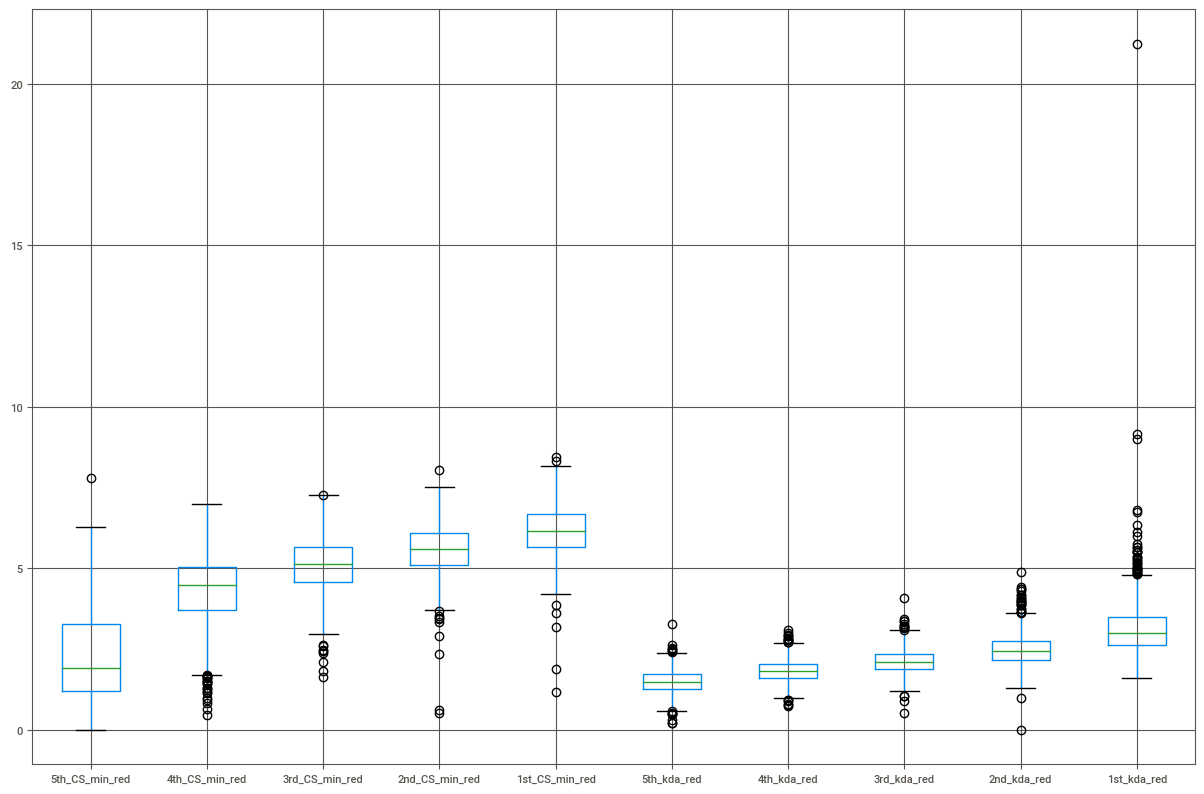

In [29]:
df_red_team.boxplot(figsize=(15,10))

In [33]:
df.corr()['target'].sort_values(ascending = False)

target             1.000000
2nd_kda_blue       0.097889
1st_kda_blue       0.054274
3rd_kda_blue       0.049027
4th_kda_blue       0.046368
1st_CS_min_blue    0.030379
3rd_CS_min_blue    0.028221
5th_CS_min_blue    0.027822
5th_kda_blue       0.027431
4th_CS_min_blue    0.022112
2nd_CS_min_blue    0.010795
5th_CS_min_red     0.002371
1st_kda_red       -0.047959
4th_CS_min_red    -0.049450
3rd_CS_min_red    -0.055293
1st_CS_min_red    -0.063077
2nd_CS_min_red    -0.075622
2nd_kda_red       -0.087365
3rd_kda_red       -0.097378
4th_kda_red       -0.126672
5th_kda_red       -0.130338
Name: target, dtype: float64